# Jupyter Notebook showing Numpy/Pandas use with In-situ Data
## Memory reduction technique /  Data Preparation
## AC9 Flow-thru data

Includes references to plotting using Matplotlib and related tools.

## References

+ https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

In [1]:
############################################
# INCLUDES
############################################
#libraries specific to this example
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
import matplotlib as matplt
import matplotlib.pyplot as plt

#a set of libraries that perhaps should always be in Python source
import os 
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings

#a darn useful library for creating paths and one I recommend you load to your environment
from pathlib import Path

from pydoc import help                          # can type in the python console `help(name of function)` to get the documentation

#Import a custom library, in this case a fairly useful logging framework
debug_lib_location = Path("./")
sys.path.append(str(debug_lib_location))
import debug

warnings.filterwarnings('ignore')               # don't print out warnings


root_location="." + os.sep + "data";

In [2]:
############################################
#JUPYTER NOTEBOOK OUTPUT CONTROL / FORMATTING
############################################
#set floating point to 4 places to things don't run loose
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

# Variable declaration

In [3]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1
DEBUG_DATA = 0

# CODE CONSTRAINTS
VERSION_NAME    = "AC9_Flow-thru"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1

#used for values outside standard ASCII, just do it, you'll need it
ENCODING  ="utf-8"

############################################
# GLOBAL CONSTANTS
############################################


############################################
# APPLICATION VARIABLES
############################################

############################################
# GLOBAL CONFIGURATION
############################################
os.environ['PYTHONIOENCODING']=ENCODING


# Example of Defining a Function

In [4]:
def lib_diagnostics():
    debug.msg_debug("System version    #:{:>12}".format(sys.version))
    debug.msg_debug("Matplotlib version#:{:>12}".format(matplt.__version__))
    debug.msg_debug("Numpy version     #:{:>12}".format(np.__version__))
    debug.msg_debug("Pandas version    #:{:>12}".format(pd.__version__))
    debug.msg_debug("SciPy version     #:{:>12}".format(sp.__version__))

    return

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


# Library Invocation
### Note that it's also useful to use this code so that you carry around a list of version dependencies and know how you did something (version)

In [6]:
lib_diagnostics()

[2021-06-15 10:05:24 Central Daylight Time]   DEBUG: System version    #:3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 22:22:21) [MSC v.1916 64 bit (AMD64)] 
[2021-06-15 10:05:24 Central Daylight Time]   DEBUG: Matplotlib version#:       3.2.1 
[2021-06-15 10:05:24 Central Daylight Time]   DEBUG: Numpy version     #:      1.18.4 
[2021-06-15 10:05:24 Central Daylight Time]   DEBUG: Pandas version    #:       1.0.3 
[2021-06-15 10:05:24 Central Daylight Time]   DEBUG: SciPy version     #:       1.4.1 


# Data Read
### Using pandas read in a data file and establish a log for output.

In [7]:
filename=root_location + os.sep + "All_flo-thru.dat"

#there are an insane number of options, but generally if you have well structured data it's 'magic'
#Reference:http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv
#changed \t delimiter to ^ which made parsing the columns far easier

#straight from the WAP output with the delimiter modified
ac9flothru=pd.read_csv(filename, delimiter='^')



# Informatics

In [8]:
ac9flothru.head()

,Time(ms),Latitude,Longitude,Bottom_Depth(m),UTC/GMT_Time,a650__,a676__,a715__,c510__,c532__,...,c650__,c676__,c715__,a510__,a532__,a555__,c412__,c440__,c488__,Temperature(C)
0,"1,000.0000",30.3225,88.8931,0.0000,0.6713,0.6869,0.7193,0.5224,4.5003,4.1485,...,3.0008,2.8428,2.5976,1.3964,1.1843,1.0358,7.2849,6.0743,4.9176,14.4400
1,"2,000.0000",30.3225,88.8930,0.0000,0.6713,0.6901,0.7230,0.5237,4.5042,4.1503,...,3.0029,2.8432,2.5969,1.3960,1.1816,1.0312,7.2719,6.0647,4.9079,14.4400
2,"2,000.0000",30.3225,88.8930,0.0000,0.6713,0.6838,0.7157,0.5178,4.4947,4.1395,...,2.9922,2.8340,2.5881,1.3922,1.1809,1.0320,7.2677,6.0596,4.9026,14.4400
3,"2,000.0000",30.3225,88.8930,0.0000,0.6713,0.6864,0.7204,0.5217,4.4900,4.1368,...,2.9948,2.8400,2.5931,1.4021,1.1878,1.0360,7.2665,6.0578,4.8996,14.4400
4,"2,000.0000",30.3225,88.8930,0.0000,0.6713,0.6865,0.7197,0.5226,4.4867,4.1345,...,2.9924,2.8363,2.5932,1.3998,1.1818,1.0269,7.2650,6.0572,4.8975,14.4400


In [9]:
ac9flothru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time(ms)         47985 non-null  float64
 1   Latitude         47985 non-null  float64
 2   Longitude        47985 non-null  float64
 3   Bottom_Depth(m)  47985 non-null  float64
 4   UTC/GMT_Time     47985 non-null  float64
 5   a650__           47985 non-null  float64
 6   a676__           47985 non-null  float64
 7   a715__           47985 non-null  float64
 8   c510__           47985 non-null  float64
 9   c532__           47985 non-null  float64
 10  c555__           47985 non-null  float64
 11  a412__           47985 non-null  float64
 12  a440__           47985 non-null  float64
 13  a488__           47985 non-null  float64
 14  c650__           47985 non-null  float64
 15  c676__           47985 non-null  float64
 16  c715__           47985 non-null  float64
 17  a510__      

In [10]:
ac9flothru.describe()

,Time(ms),Latitude,Longitude,Bottom_Depth(m),UTC/GMT_Time,a650__,a676__,a715__,c510__,c532__,...,c650__,c676__,c715__,a510__,a532__,a555__,c412__,c440__,c488__,Temperature(C)
count,"47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000",...,"47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000","47,985.0000"
mean,"973,339.1018",30.2779,88.8528,0.0000,0.7632,1.6114,1.6546,1.4373,6.2785,5.9891,...,4.9838,4.8070,4.6157,2.2101,2.0372,1.9096,8.4568,7.5652,6.6323,14.4400
std,"741,159.0582",0.0251,0.0158,0.0000,0.0551,1.0826,1.0901,1.0433,2.9314,2.9665,...,2.9183,2.8268,2.9377,1.1013,1.0933,1.0857,2.9042,2.9979,2.9606,0.0000
min,"1,000.0000",30.2592,88.8379,0.0000,0.6713,0.6395,0.6706,0.4923,4.0628,3.7764,...,2.7992,2.6459,2.3995,1.2909,1.1332,0.9852,6.1979,5.3186,4.4032,14.4400
25%,"358,030.0000",30.2611,88.8414,0.0000,0.6996,0.8747,0.9200,0.7296,4.7065,4.4304,...,3.4866,3.3207,3.1059,1.4153,1.2586,1.1439,7.1109,5.9866,5.0355,14.4400
50%,"776,940.0000",30.2742,88.8485,0.0000,0.7862,1.3581,1.4038,1.1993,5.8794,5.6137,...,4.6988,4.5393,4.3546,1.9190,1.7560,1.6379,7.8835,7.0514,6.1997,14.4400
75%,"1,528,010.0000",30.2796,88.8559,0.0000,0.8114,2.1085,2.1572,1.9197,7.4122,7.1311,...,6.1581,5.9789,5.8107,2.7237,2.5486,2.4175,9.5084,8.6676,7.7574,14.4400
max,"2,762,110.0000",30.3906,88.9025,0.0000,0.8355,28.3951,29.2531,27.7509,100.0000,100.0000,...,100.0000,100.0000,100.0000,31.1526,30.3958,30.0709,100.0000,100.0000,100.0000,14.4400


In [11]:
#show column header names.
print(ac9flothru.columns)

Index(['Time(ms)', 'Latitude', 'Longitude', 'Bottom_Depth(m)', 'UTC/GMT_Time',
       'a650__', 'a676__', 'a715__', 'c510__', 'c532__', 'c555__', 'a412__',
       'a440__', 'a488__', 'c650__', 'c676__', 'c715__', 'a510__', 'a532__',
       'a555__', 'c412__', 'c440__', 'c488__', 'Temperature(C)'],
      dtype='object')


# Memory reduction

In [12]:
ac9flowthru = reduce_mem_usage(ac9flothru)

Memory usage of dataframe is 8.79 MB
Memory usage after optimization is: 2.29 MB
Decreased by 74.0%


# Data Re-Alignment

In [13]:
columns = ['c412__', 'c440__', 'c488__','c510__', 'c532__', 'c555__','c650__', 'c676__', 'c715__',
           'a412__','a440__', 'a488__', 'a510__', 'a532__','a555__','a650__', 'a676__', 'a715__',
           'Temperature(C)']

new_ac9flowthru=pd.DataFrame()
for column in columns:
    new_ac9flowthru[column] = ac9flowthru[column]

ac9flowthru = new_ac9flowthru
#ac9flowthru

In [14]:
ac9flowthru.max(axis=0)[0:8].values

array([100., 100., 100., 100., 100., 100., 100., 100.], dtype=float16)

In [56]:
#have pandas return each data extreme, return as an array and perform a final function on the array
max_csum=np.amax( ac9flowthru.max(axis=0)[0:8].values )
min_csum=np.amax( ac9flowthru.min(axis=0)[0:8].values )
avg_csum=np.amax( ac9flowthru.mean(axis=0)[0:8].values )

max_asum=np.amax( ac9flowthru.max(axis=0)[9:17].values )
min_asum=np.amax( ac9flowthru.min(axis=0)[9:17].values )
avg_asum=np.amax( ac9flowthru.mean(axis=0)[9:17].values )

print("Beam Attenuation")
print("...max {}".format(max_csum))
print("")

print("...min {}".format(min_csum))
print("")

print("...avg {}".format(avg_csum))

print("Absorption")
print("...max {}".format(max_asum))
print("")

print("...min {}".format(min_asum))
print("")

print("...avg {}".format(avg_asum))


Beam Attenuation
...max 100.0

...min 6.19921875

...avg 0.7177734375
Absorption
...max 100.0

...min 2.7265625

...avg 0.397216796875


# Histograms

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian’, skewed or even has an exponential distribution. It can also help you see possible outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC51752AC8>,
      dtype=object)

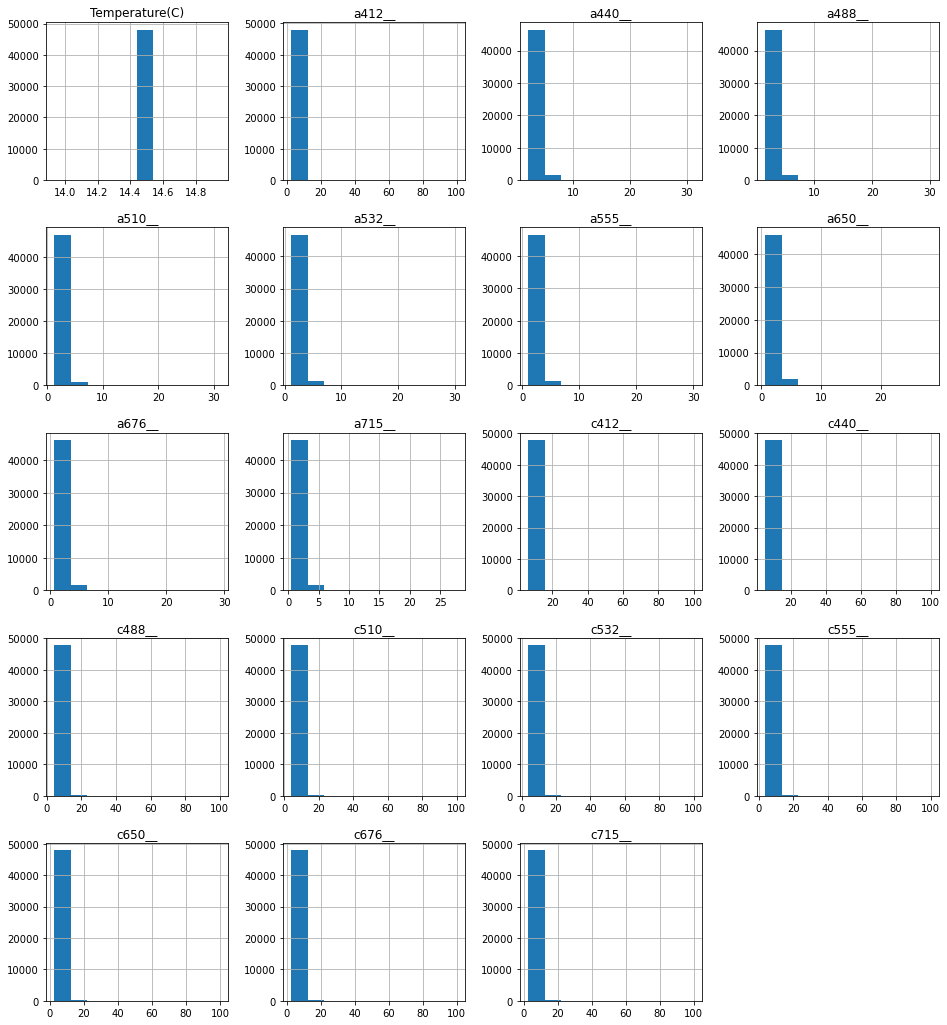

In [57]:
ac9flowthru.hist(figsize = (16,18), bins=10)

# Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC4EF46D48>,
      dtype=object)

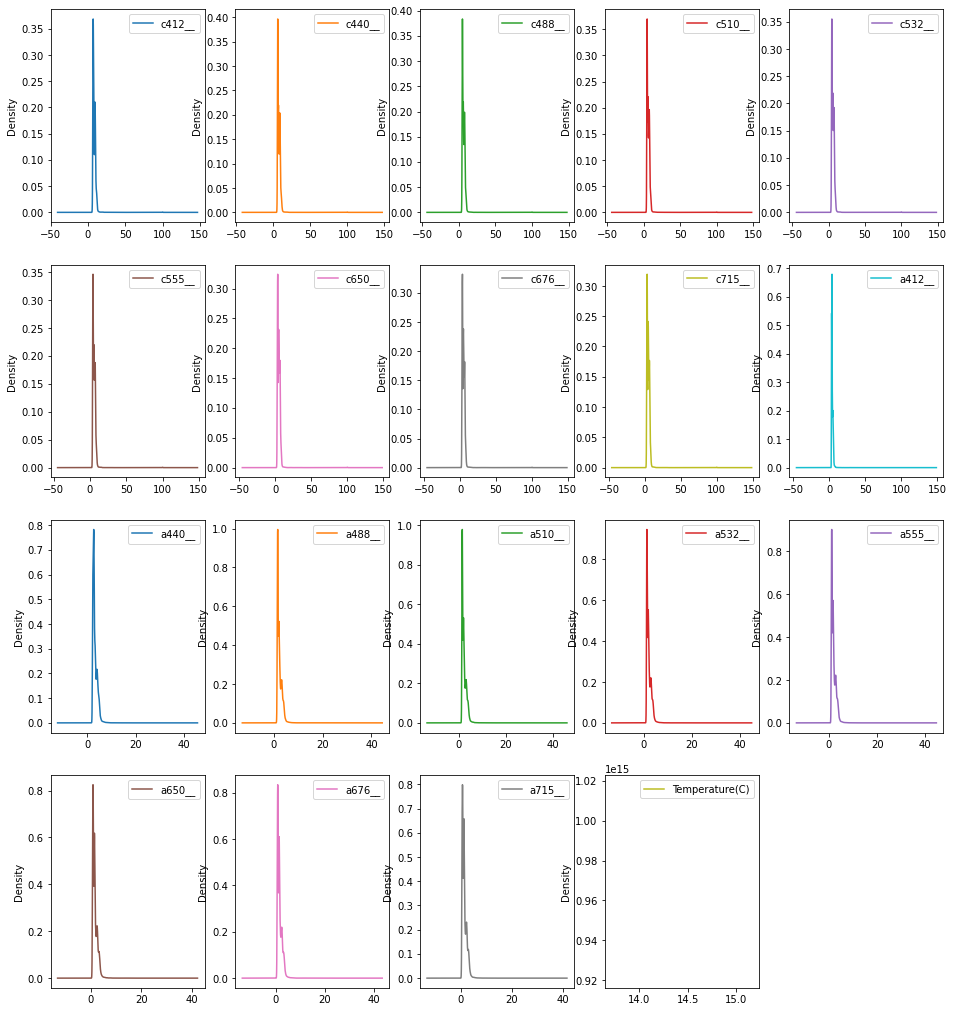

In [59]:
ac9flowthru.plot(kind='density', subplots=True, layout=(4,5), sharex=False, figsize = (16,18))

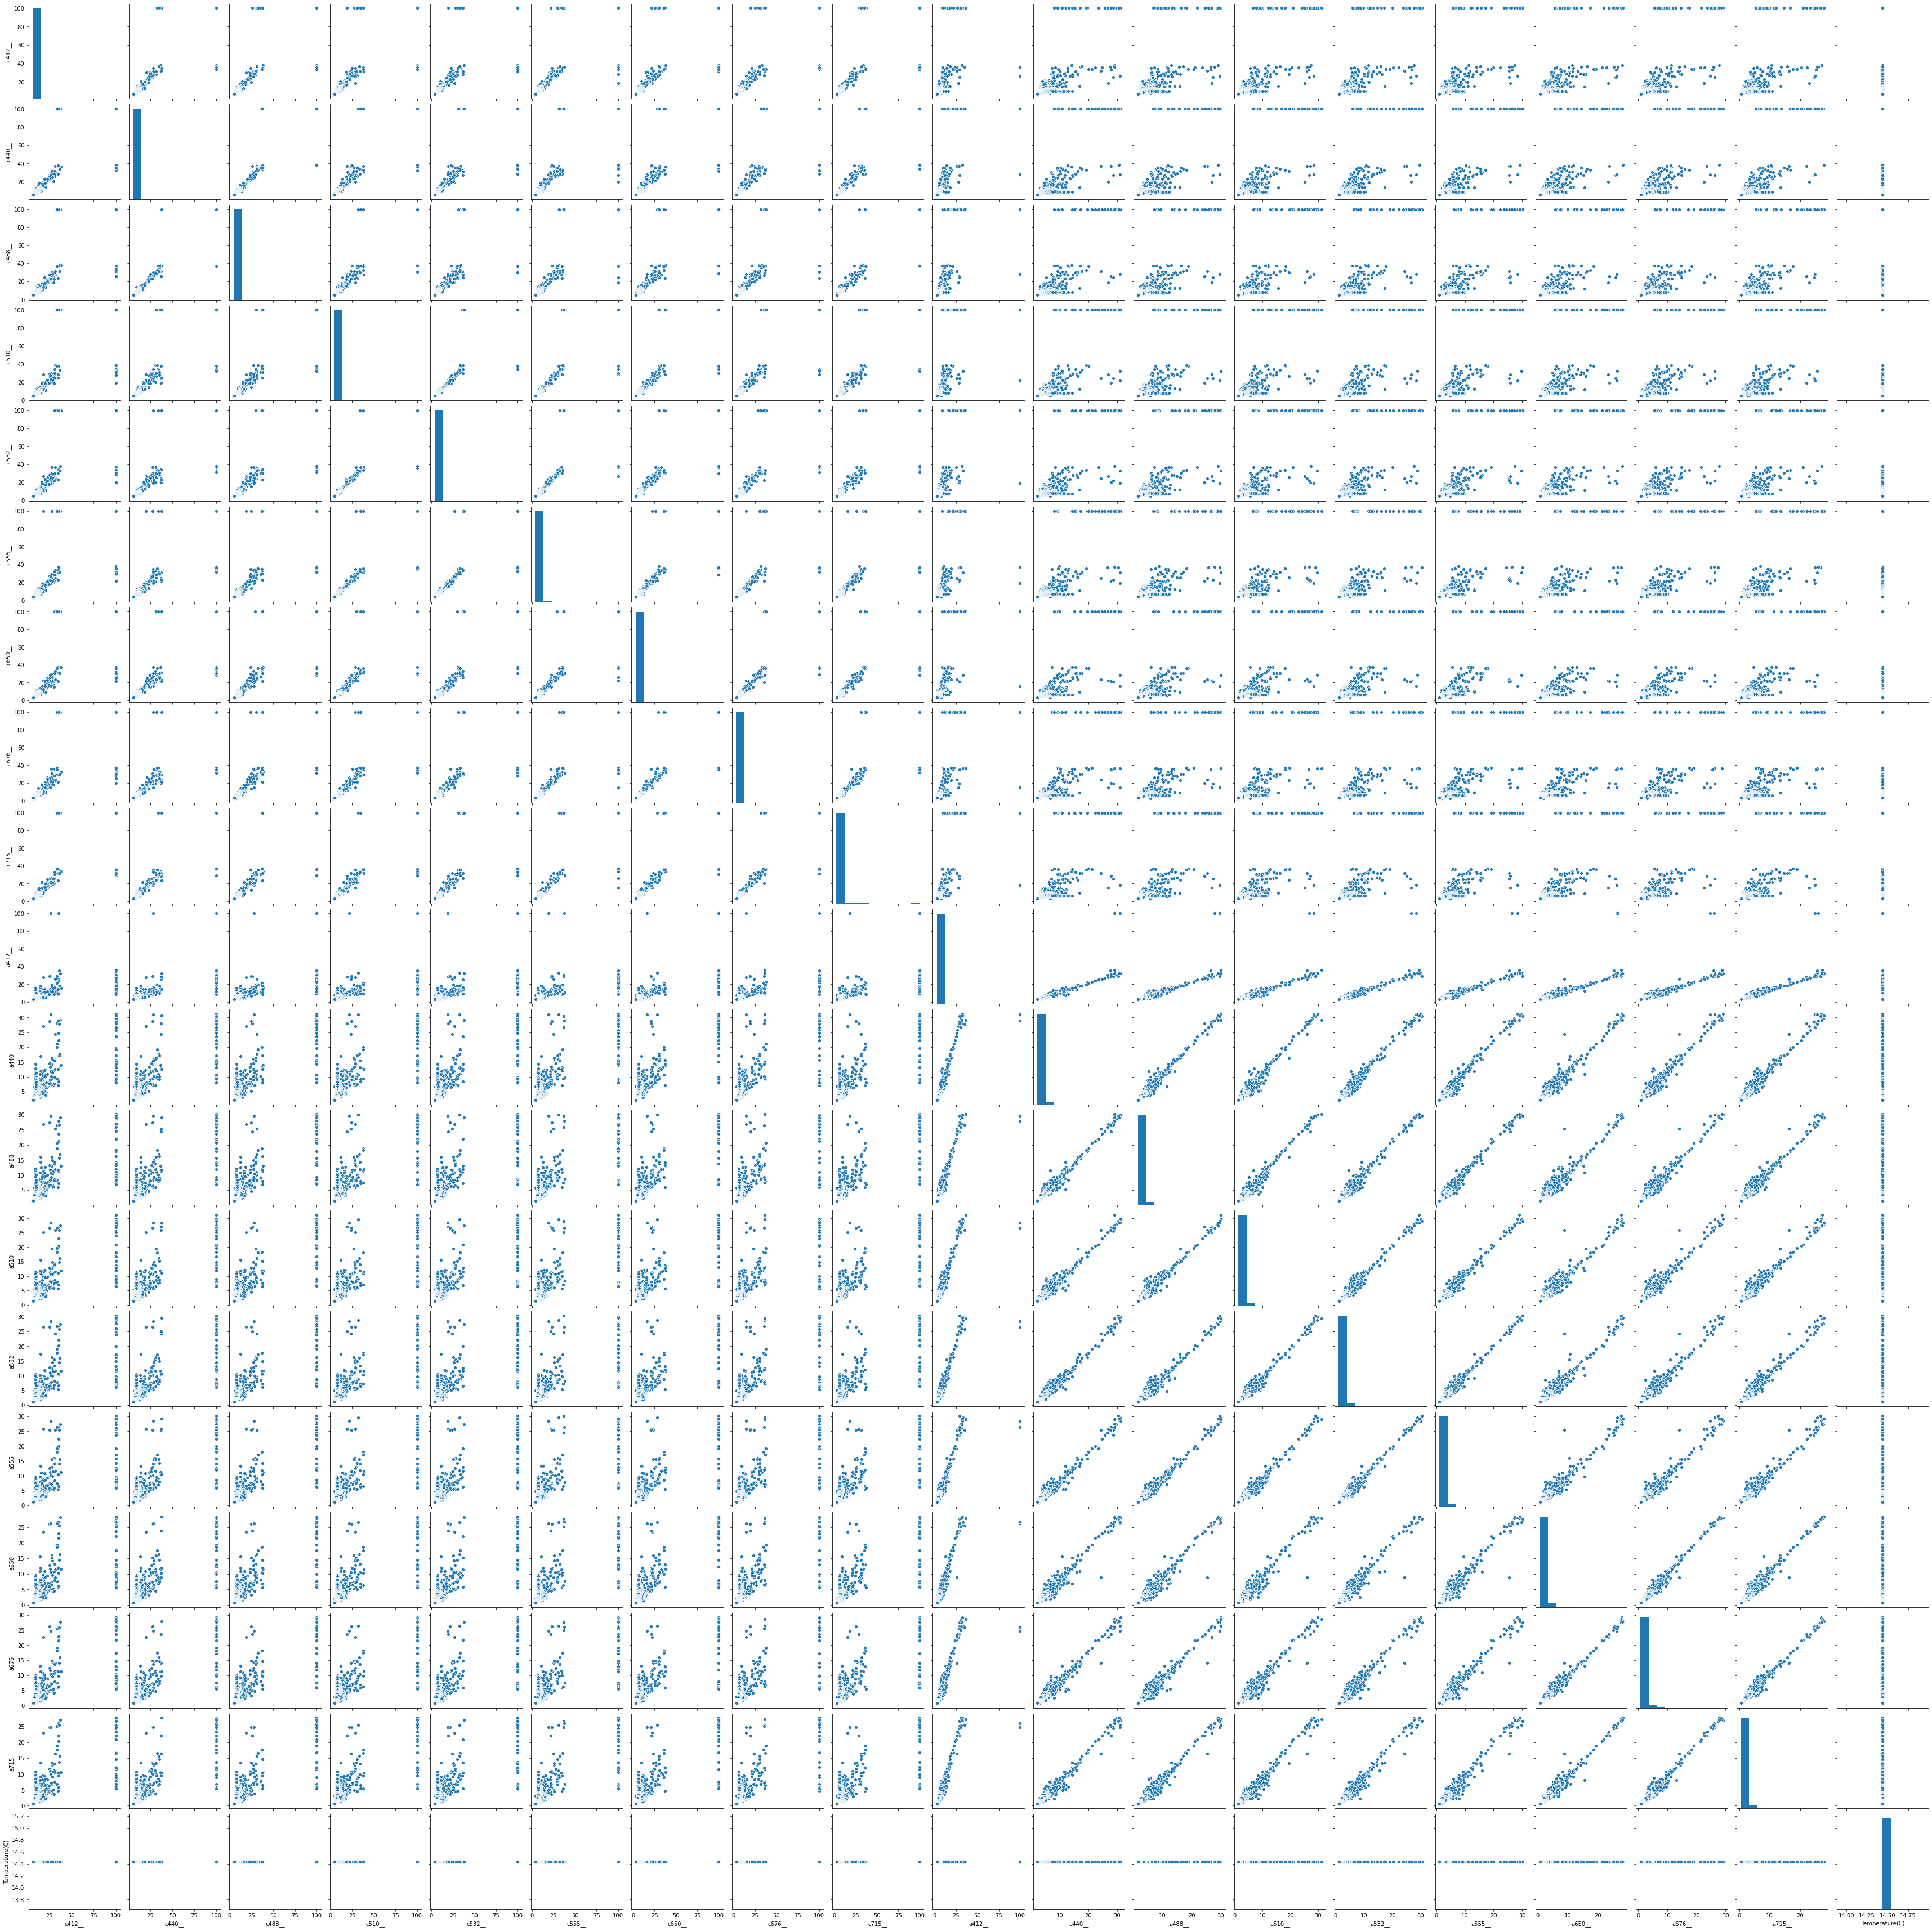

In [74]:
import seaborn as sns
sns.pairplot(ac9flowthru)

In [ ]:
g = sns.PairGrid(ac9flowthru, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

# Box and Whisker Plots

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

c412__                AxesSubplot(0.125,0.71587;0.133621x0.16413)
c440__             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
c488__              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
c510__             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
c532__             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
c555__               AxesSubplot(0.125,0.518913;0.133621x0.16413)
c650__            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
c676__             AxesSubplot(0.44569,0.518913;0.133621x0.16413)
c715__            AxesSubplot(0.606034,0.518913;0.133621x0.16413)
a412__            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
a440__               AxesSubplot(0.125,0.321957;0.133621x0.16413)
a488__            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
a510__             AxesSubplot(0.44569,0.321957;0.133621x0.16413)
a532__            AxesSubplot(0.606034,0.321957;0.133621x0.16413)
a555__            AxesSubplot(0.766379,0.321957;0.133621x0.16413)
a650__    

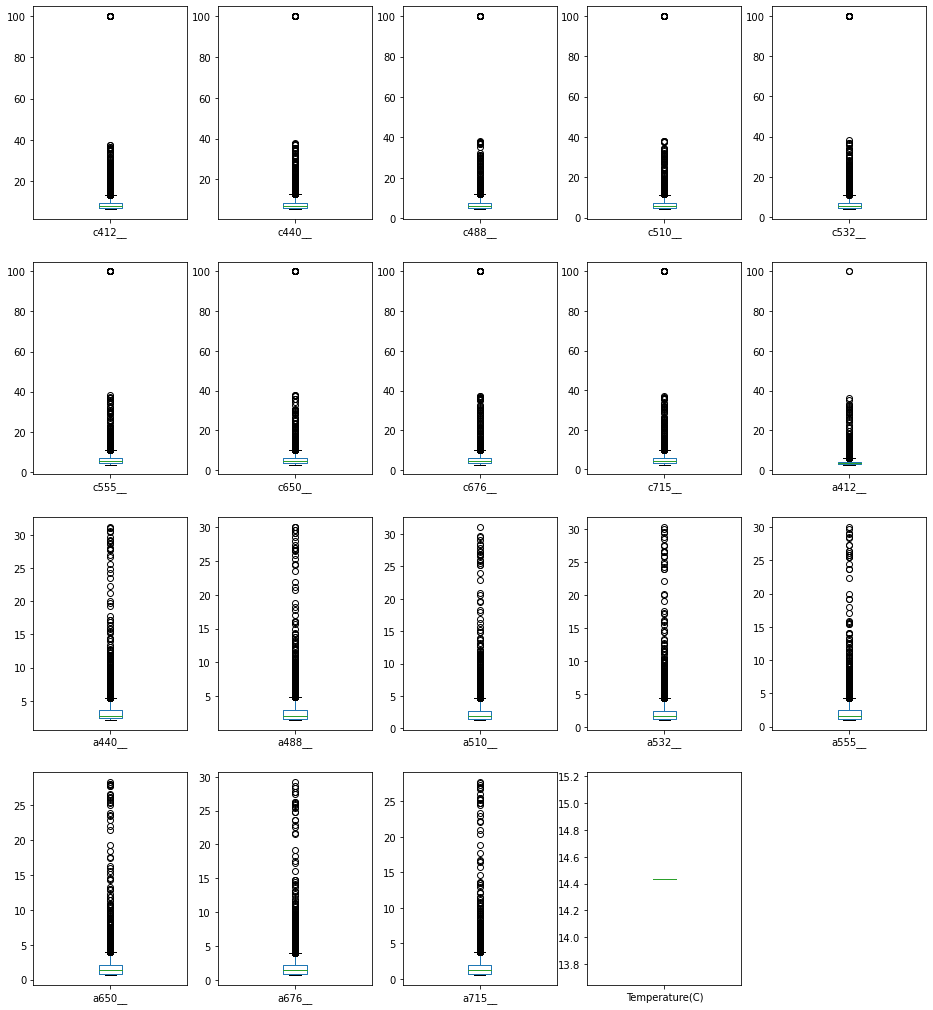

In [61]:
ac9flowthru.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False,figsize = (16,18))

# Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

[Text(0, 1, 'c412__'),
 Text(0, 1, 'c440__'),
 Text(0, 1, 'c488__'),
 Text(0, 1, 'c510__'),
 Text(0, 1, 'c532__'),
 Text(0, 1, 'c555__'),
 Text(0, 1, 'c650__'),
 Text(0, 1, 'c676__'),
 Text(0, 1, 'c715__'),
 Text(0, 1, 'a412__'),
 Text(0, 1, 'a440__'),
 Text(0, 1, 'a488__'),
 Text(0, 1, 'a510__'),
 Text(0, 1, 'a532__'),
 Text(0, 1, 'a555__'),
 Text(0, 1, 'a650__'),
 Text(0, 1, 'a676__'),
 Text(0, 1, 'a715__'),
 Text(0, 1, 'Temperature(C)')]

[Text(0, 0, 'c412__'),
 Text(0, 0, 'c440__'),
 Text(0, 0, 'c488__'),
 Text(0, 0, 'c510__'),
 Text(0, 0, 'c532__'),
 Text(0, 0, 'c555__'),
 Text(0, 0, 'c650__'),
 Text(0, 0, 'c676__'),
 Text(0, 0, 'c715__'),
 Text(0, 0, 'a412__'),
 Text(0, 0, 'a440__'),
 Text(0, 0, 'a488__'),
 Text(0, 0, 'a510__'),
 Text(0, 0, 'a532__'),
 Text(0, 0, 'a555__'),
 Text(0, 0, 'a650__'),
 Text(0, 0, 'a676__'),
 Text(0, 0, 'a715__'),
 Text(0, 0, 'Temperature(C)')]

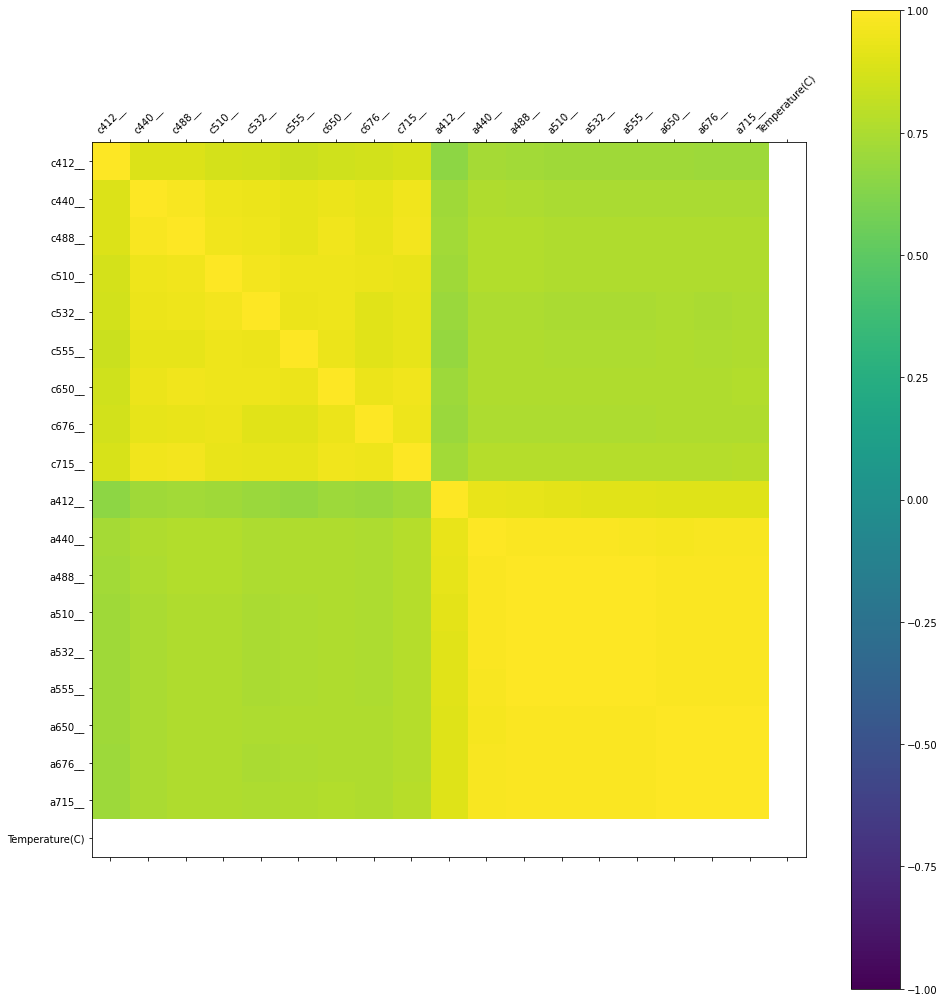

In [70]:
correlations = ac9flowthru.corr()
names=ac9flowthru.columns
# plot correlation matrix
fig = plt.figure(figsize = (16,18))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45)
ax.set_yticklabels(names)
plt.show()

# Scatterplot Matrix

A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix.

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E57A6EF3C8>,
      dtype=object)

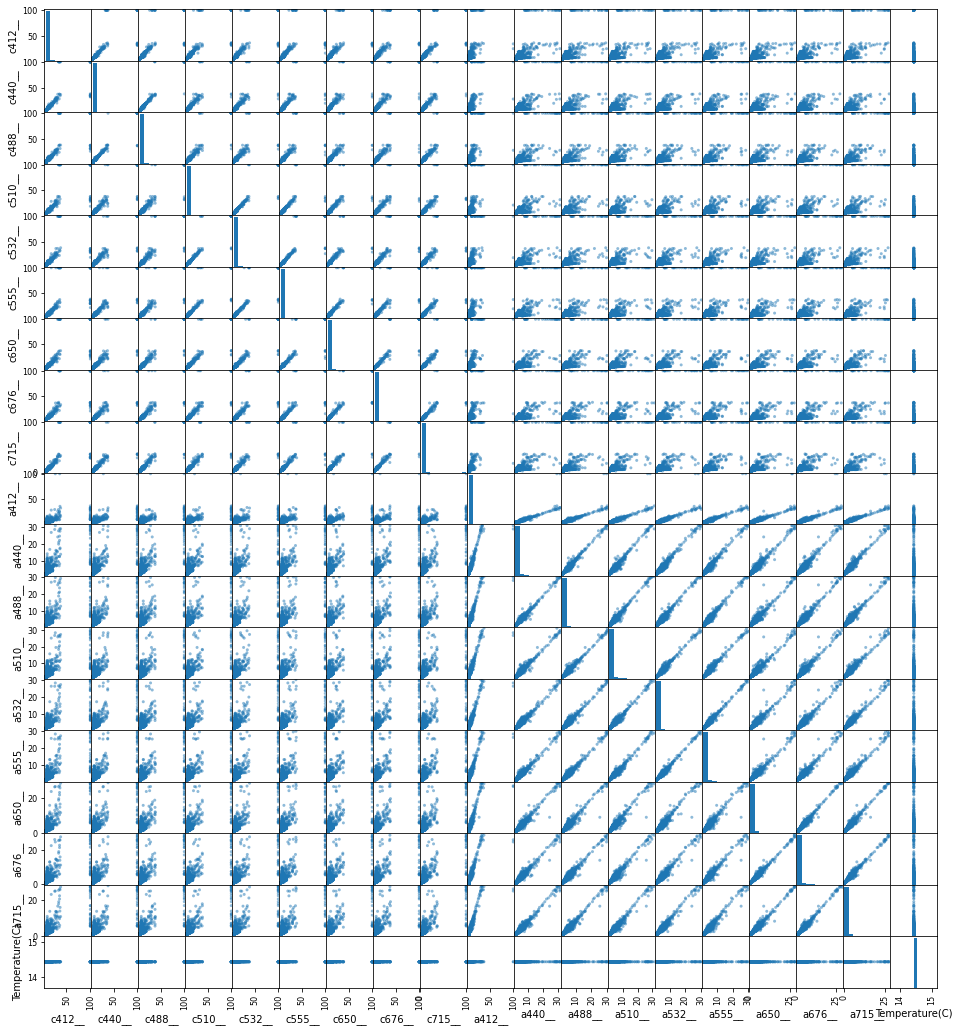

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(ac9flowthru,figsize = (16,18))